In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import joblib
import sklearn
import xgboost
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Financial_inclusion_dataset.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
df = data.copy()

In [5]:
df.drop('uniqueid', axis = 1, inplace = True)

In [6]:
df.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [9]:
encoded = {}

for i in df.select_dtypes(exclude = 'number'):   
    encoder = LabelEncoder() 
    df[i] = encoder.fit_transform(df[i]) 
    encoded[i + '_encoder'] = encoder 
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb')) 

encoded

{}

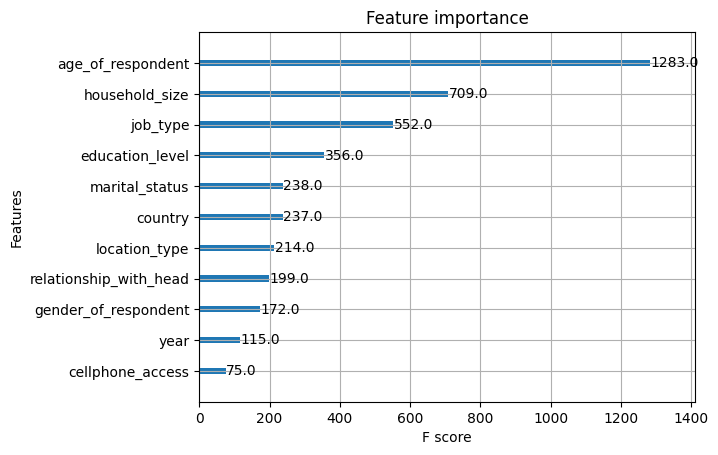

In [10]:
import matplotlib.pyplot as plt
import xgboost as xgb
model = xgb.XGBClassifier()

x = df.drop('bank_account', axis = 1)
y = df.bank_account

model.fit(x, y)

xgb.plot_importance(model, importance_type = 'weight')
plt.show()

In [12]:
df.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [13]:
sel_cols = ['age_of_respondent', 'household_size', 'job_type', 'education_level',
            'marital_status', 'country', 'bank_account']
df = df[sel_cols]
df.head()

,age_of_respondent,household_size,job_type,education_level,marital_status,country,bank_account
0,24,3,9,3,2,0,1
1,70,5,4,0,4,0,0
2,26,5,9,5,3,0,1
3,34,5,3,2,2,0,0
4,26,8,5,2,3,0,0


In [14]:
x = df.drop('bank_account', axis = 1)
y = df.bank_account

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 45)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(xtrain, ytrain)


cross_validation = log_reg.predict(xtrain) 
print(classification_report(cross_validation, ytrain)) 

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     18083
           1       0.18      0.63      0.28       736

    accuracy                           0.87     18819
   macro avg       0.58      0.76      0.60     18819
weighted avg       0.95      0.87      0.90     18819



In [16]:
pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/257.7 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/257.7 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/257.7 kB 328.2 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/257.7 kB 381.3 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 435.7 kB/s eta 0:00:01
   ------------------ --------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[Text(0, 0, '16169'), Text(0, 0, '16169')]

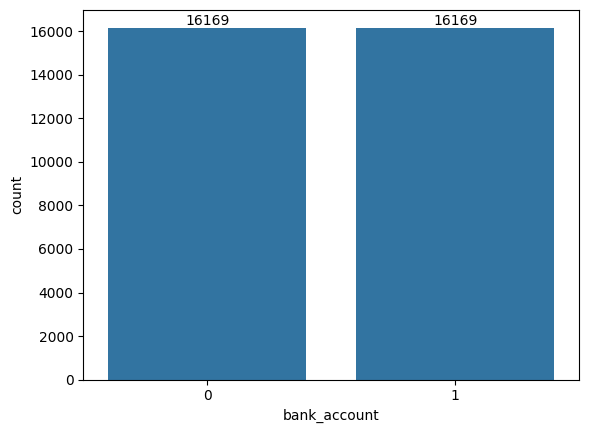

In [17]:
from imblearn.over_sampling  import SMOTE

x = df.drop('bank_account', axis = 1)
y = df.bank_account

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 23)

smote = SMOTE(sampling_strategy= 'auto', random_state=5)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

fig = sns.countplot(x = y_resampled)
fig.bar_label(fig.containers[0])

In [18]:
from sklearn.ensemble import RandomForestClassifier

rand_model = RandomForestClassifier()

rand_model.fit(X_resampled, y_resampled)


cross_validation = rand_model.predict(X_resampled) 
print(classification_report(cross_validation, y_resampled))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     15870
           1       0.94      0.92      0.93     16468

    accuracy                           0.93     32338
   macro avg       0.93      0.93      0.93     32338
weighted avg       0.93      0.93      0.93     32338



<Axes: >

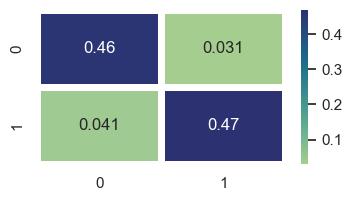

In [19]:
revealer = confusion_matrix(cross_validation, y_resampled)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3696
           1       0.50      0.33      0.40      1009

    accuracy                           0.79      4705
   macro avg       0.67      0.62      0.64      4705
weighted avg       0.76      0.79      0.77      4705



<Axes: >

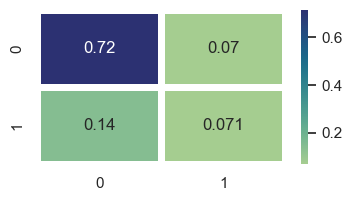

In [20]:
pred = rand_model.predict(xtest) 
print(classification_report(pred, ytest))

revealer = confusion_matrix(pred, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [48]:
joblib.dump(log_reg, open('Financialinc.pkl', 'wb'))